## Summary

## Introduction

In [1]:
#imports

from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

import sklearn 
import numpy as np 
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import altair_ally as aly
import altair as alt
import vegafusion
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
)
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Data

The dataset utilized for this project originates from the Kaggle, available through the following link: https://www.kaggle.com/datasets/rahulchavan99/marketing-campaign-dataset. It comprises 35 columns/variables and encompasses a substantial volume of data, totaling 72612 rows. The available information includes details about the campaigns, the corresponding date of impression, clicks , and the landing pages. These data points serve as crucial elements for our analysis and forecasting efforts.

In [2]:
df = pd.read_csv("data/raw/marketing-campaign-dataset.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.4, random_state=123)
train_df

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
46555,3186,32,2022-10-29,128,Facebook Ads,9515,300.0,250.0,#The Power of X,90.0,...,1,3.083007,NaN,NaN,NaN,Inmarket,AED,Asia/Kolkata,week_day,exquisite jewelry
28846,3158,10,2022-07-18,128,Facebook Ads,6390,300.0,250.0,#Timeless X Style,93.0,...,1,1.836111,NaN,NaN,NaN,Others,AED,Asia/Kolkata,week_day,elegant and modern jewelry
16746,3039,6,2022-09-11,16,DV360,3345,300.0,250.0,#The X Factor - Fashion for the Fearless,93.0,...,1,31.061415,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_end,multi-strand necklaces
23724,3149,27,2022-11-13,128,Facebook Ads,5340,300.0,250.0,#The X Factor - Fashion for the Fearless,90.0,...,1,0.418948,NaN,NaN,NaN,Others,AED,Asia/Kolkata,week_end,body jewelry
60623,3212,6,2022-09-04,4,Google Ads,11895,300.0,250.0,#Timeless X Style,90.0,...,1,0.000000,NaN,NaN,NaN,Others,AED,Asia/Kolkata,week_end,statement pins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,3216,31,2022-10-24,16,DV360,12560,300.0,250.0,#Timeless X Style,90.0,...,1,1.192337,NaN,NaN,NaN,Others,AED,Asia/Kolkata,week_day,affordable jewelry
61404,3213,20,2022-10-13,128,Facebook Ads,12060,300.0,250.0,#Be Bold. Be X,90.0,...,1,0.720463,NaN,NaN,NaN,Others,AED,Asia/Kolkata,week_day,summer jewelry
17730,3053,10,2022-09-02,16,DV360,3620,300.0,250.0,#Be Bold. Be X,90.0,...,1,75.348995,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,seasonal jewelry
28030,3155,6,2022-08-22,128,Facebook Ads,6085,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,0.836557,NaN,NaN,NaN,Others,AED,Asia/Kolkata,week_day,winter jewelry


### EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43567 entries, 46555 to 15725
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     43567 non-null  int64  
 1   no_of_days           43567 non-null  int64  
 2   time                 43567 non-null  object 
 3   ext_service_id       43567 non-null  int64  
 4   ext_service_name     43567 non-null  object 
 5   creative_id          43567 non-null  int64  
 6   creative_width       41506 non-null  float64
 7   creative_height      41506 non-null  float64
 8   search_tags          43567 non-null  object 
 9   template_id          41506 non-null  float64
 10  landing_page         43567 non-null  object 
 11  advertiser_id        43567 non-null  int64  
 12  advertiser_name      43567 non-null  object 
 13  network_id           43567 non-null  int64  
 14  approved_budget      43307 non-null  float64
 15  advertiser_currency  43567 non-null  

In [4]:
train_df.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,...,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach
count,43567.000000,43567.000000,43567.000000,43567.000000,41506.000000,41506.000000,41506.000000,43567.000000,43567.000000,4.330700e+04,...,4462.0,43567.0,43567.000000,43567.000000,43567.000000,43567.0,43567.000000,0.0,0.0,0.0
mean,3130.177084,27.124957,49.244704,7449.946290,267.778153,223.148460,83.074953,6194.836413,345.276631,1.262258e+05,...,1.0,0.0,615.699884,1362.903872,52.098676,1.0,11.737795,NaN,NaN,NaN
std,142.343340,25.580910,55.808891,4066.286088,92.889799,77.408165,20.856817,388.362396,23.676732,5.616217e+05,...,0.0,0.0,1355.030025,3779.527821,398.461339,0.0,48.594127,NaN,NaN,NaN
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,23.000000,4756.000000,188.000000,4.000000e+02,...,1.0,0.0,2.452316,511.000000,2.000000,1.0,0.000000,NaN,NaN,NaN
25%,3148.000000,9.000000,4.000000,3712.500000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,...,1.0,0.0,205.994550,526.000000,5.000000,1.0,0.435080,NaN,NaN,NaN
50%,3173.000000,19.000000,16.000000,7885.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,...,1.0,0.0,379.564033,577.000000,8.000000,1.0,1.716658,NaN,NaN,NaN
75%,3202.000000,37.000000,128.000000,10997.500000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,...,1.0,0.0,755.313351,818.000000,13.000000,1.0,8.336886,NaN,NaN,NaN
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,...,1.0,0.0,39559.896155,153959.000000,31807.000000,1.0,1736.847024,NaN,NaN,NaN


In [5]:
train_df.nunique()

campaign_item_id         157
no_of_days               119
time                     224
ext_service_id             3
ext_service_name           3
creative_id             2820
creative_width             2
creative_height            2
search_tags                6
template_id                5
landing_page              45
advertiser_id             47
advertiser_name           44
network_id                 6
approved_budget           61
advertiser_currency        5
channel_id                 5
channel_name               5
max_bid_cpm                1
network_margin             1
campaign_budget_usd      696
impressions             5072
clicks                   986
stats_currency             5
currency_code              5
exchange_rate              1
media_cost_usd         43202
position_in_content        0
unique_reach               0
total_reach                0
search_tag_cat             5
cmi_currency_code          5
timezone                   7
weekday_cat                2
keywords      

### Distributions

In [6]:
alt.data_transformers.enable("vegafusion")

non_empty_numeric_cols = [col for col in train_df.select_dtypes("number").columns if train_df[col].notna().any()]
numeric_cols_dist = alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type = "quantitative", bin = alt.Bin(maxbins = 20)),
    y ="count()",
).properties(
        width = 250,
        height = 150
).repeat(
    non_empty_numeric_cols,
    columns = 3
)

numeric_cols_dist

alt.RepeatChart(...)

### Distribution of categorical columns

In [7]:
cat_cols = list(train_df.select_dtypes("object").columns.drop('time'))

categorical_cols_dist = alt.Chart(train_df).mark_bar().encode(
    x=alt.X(alt.repeat("repeat"), type="nominal"),
    y="count()",
).properties(
    width=550,
    height=150
).repeat(
    repeat=cat_cols,
    columns=1
)

categorical_cols_dist

alt.RepeatChart(...)

In [8]:
def missing_zero_values(df):

    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("The dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
           "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    return mz_table
missing_zero_values(train_df)

The dataframe has 35 columns and 43567 Rows.
There are 8 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
position_in_content,0,43567,100.0,43567,100.0,float64
unique_reach,0,43567,100.0,43567,100.0,float64
total_reach,0,43567,100.0,43567,100.0,float64
max_bid_cpm,0,39105,89.8,39105,89.8,float64
creative_width,4458,2061,4.7,6519,15.0,float64
creative_height,4458,2061,4.7,6519,15.0,float64
template_id,0,2061,4.7,2061,4.7,float64
approved_budget,0,260,0.6,260,0.6,float64


In [9]:
aly.corr(train_df)

alt.ConcatChart(...)

Text(0.5, 1.0, 'Service name vs clicks')

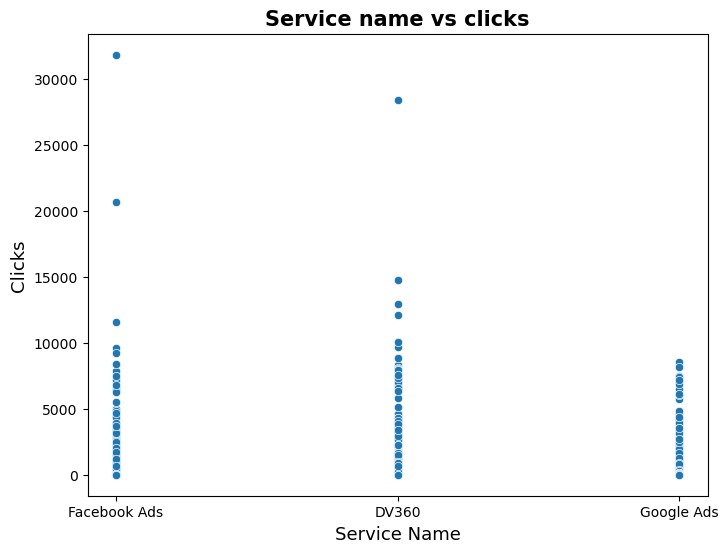

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ext_service_name', y='clicks', data=train_df)

plt.xlabel("Service Name", size=13)
plt.ylabel("Clicks", size=13)
plt.title("Service name vs clicks",size=15, weight='bold')

Text(0.5, 1.0, 'Channel name vs clicks')

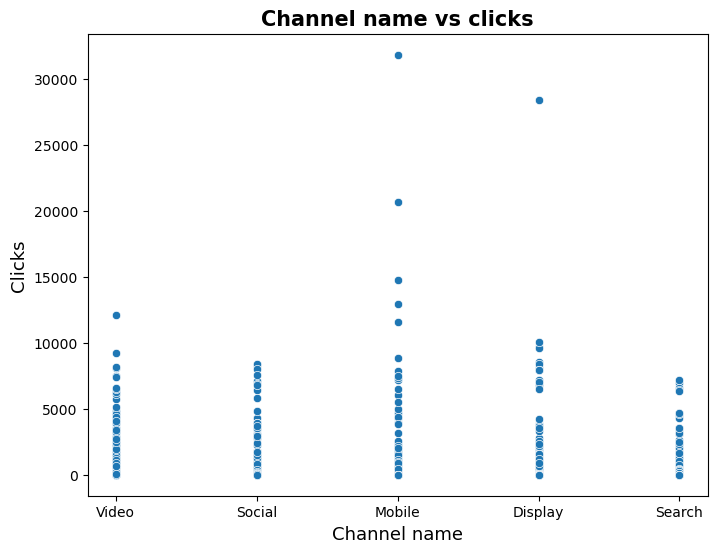

In [11]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='channel_name', y='clicks', data=train_df)

plt.xlabel("Channel name", size=13)
plt.ylabel("Clicks", size=13)
plt.title("Channel name vs clicks",size=15, weight='bold')

## Preprocessing

In [12]:
train_df['creative_width'].fillna(train_df['creative_width'].mean(), inplace=True)
train_df['creative_height'].fillna(train_df['creative_height'].mean(), inplace=True)
train_df['approved_budget'].fillna(train_df['approved_budget'].mean(), inplace=True)
test_df['creative_width'].fillna(test_df['creative_width'].mean(), inplace=True)
test_df['creative_height'].fillna(test_df['creative_height'].mean(), inplace=True)
test_df['approved_budget'].fillna(test_df['approved_budget'].mean(), inplace=True)


X_train = train_df.drop(columns=['clicks'])
y_train = train_df['clicks']
X_test = test_df.drop(columns=['clicks'])
y_test = test_df['clicks']


categorical_features = [
    'ext_service_name', 
    'search_tags',
    'advertiser_name',
    'channel_name',
    'search_tag_cat',
    'keywords',
    'campaign_item_id',
    'creative_id',
    'template_id',
    'landing_page',
    'network_id'
]


numeric_features = [
    'no_of_days', 
    'creative_width', 
    'creative_height', 
    'approved_budget',
    'campaign_budget_usd',
    'impressions',
    'media_cost_usd'
]


drop_features = [
    'timezone',
    'weekday_cat',
    'time', 
    'ext_service_id', 
    'advertiser_id',
    'channel_id',
    'max_bid_cpm',
    'network_margin',
    'advertiser_currency',
    'currency_code',
    'exchange_rate',
    'stats_currency',
    'position_in_content',
    'unique_reach', 
    'total_reach',
    'cmi_currency_code'
]
    

In [13]:
numeric_transformer = make_pipeline(
    StandardScaler()
)

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features), 
    ('drop', drop_features)
)

## Baseline model and Linear model

In [14]:
# 1. dummy model
pipe_dummy = make_pipeline(preprocessor, DummyRegressor())

cv_df = pd.DataFrame(cross_validate(pipe_dummy, X_train, y_train, return_train_score=True,scoring='r2'))
cv_df

,fit_time,score_time,test_score,train_score
0,0.057043,0.011713,-1.739782e-04,0.0
1,0.052834,0.011780,-3.511836e-05,0.0
2,0.052229,0.011671,-7.713505e-09,0.0
3,0.052851,0.012440,-2.369271e-05,0.0
4,0.052847,0.011585,-4.236760e-04,0.0


In [15]:
# 2. Linear Model  
pipe_ridge = make_pipeline(preprocessor, Ridge())

cv_df = pd.DataFrame(cross_validate(pipe_ridge, X_train, y_train, scoring='r2', return_train_score=True, cv=10))
cv_df

cross_val_results = {}
cross_val_results['ridge'] = cv_df.agg(['mean', 'std']).round(3).T
cross_val_results['ridge']

,mean,std
fit_time,0.178,0.003
score_time,0.007,0.000
test_score,0.552,0.194
train_score,0.574,0.025


In [16]:
# 2.1. Hyperparameter tuning 

param_dist = {"ridge__alpha": 10.0**np.arange(-5, 5) }

random_search = RandomizedSearchCV(
    pipe_ridge, 
    param_dist, 
    n_iter=100, 
    return_train_score=True, 
    random_state=123,
    n_jobs=-1 ,
    scoring='r2', 
    cv=5
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['no_of_days',
                                                                                'creative_width',
                                                                                'creative_height',
                                                                                'approved_budget',
                                                                                'campaign_budget_usd',
                                                                                'impressions',
                                                                                'media_cost_usd']),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEnco...
                                                                                'advertiser_currency',
                                                                                'currency_code',
                                                                                'exchange_rate',
                                                                                'stats_currency',
                                                                                'position_in_content',
                                                                                'unique_reach',
                                                                                'total_reach',
                                                                                'cmi_currency_code'])])),
                                             ('ridge', Ridge())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'ridge__alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])},
                   random_state=123, return_train_score=True, scoring='r2')

In [17]:
best_params = random_search.best_params_
best_r2 = random_search.best_score_

print("Best alpha:", best_params)
print("best score:", best_r2)

Best alpha: {'ridge__alpha': 1.0}
best score: 0.5609200843613882


## Different models

### Randomforest Regressor

In [18]:

pipe_rf = make_pipeline(
    preprocessor,
    RandomForestRegressor(max_depth=10, random_state=123)
    )

cv_rf = pd.DataFrame(cross_validate(pipe_rf, X_train, y_train, cv = 5, return_train_score = True))
cv_rf

,fit_time,score_time,test_score,train_score
0,12.617133,0.047228,0.847762,0.907148
1,12.672341,0.047893,0.423245,0.902376
2,12.918113,0.045636,0.677637,0.919840
3,12.790905,0.046227,0.627791,0.931317
4,12.671099,0.046160,0.690671,0.935679


In [19]:
cross_val_results['randomforest'] = cv_rf.agg(['mean', 'std']).round(3).T
cross_val_results['randomforest']

,mean,std
fit_time,12.734,0.121
score_time,0.047,0.001
test_score,0.653,0.153
train_score,0.919,0.015


In [20]:
pipe_rf.fit(X_train, y_train)
model_rf = pipe_rf.named_steps['randomforestregressor']


In [21]:
feature_importances_rf = model_rf.feature_importances_
feature_names_1 = pipe_rf.named_steps['columntransformer'].named_transformers_['pipeline-1'].get_feature_names_out().tolist()
feature_names_2 = pipe_rf.named_steps['columntransformer'].named_transformers_['pipeline-2'].get_feature_names_out().tolist()

feature_names = feature_names_1 + feature_names_2
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
feature_importances_rf_sorted = feature_importance_df.sort_values(by='Importance', ascending = False).head(10)
feature_importances_rf_sorted

,Feature,Importance
5,impressions,0.403872
0,no_of_days,0.095226
4,campaign_budget_usd,0.071768
779,creative_id_3200,0.060265
6,media_cost_usd,0.060028
122,keywords_fall jewelry,0.056097
2942,creative_id_14240,0.037021
74,keywords_animal jewelry,0.031342
2971,creative_id_14395,0.016474
61,channel_name_Mobile,0.011151


### XGBoost Regressor

In [22]:

pipe_xgb = make_pipeline(
    preprocessor,
    XGBRegressor(
        random_state=123, verbosity=0))
cv_df_xg = pd.DataFrame(cross_validate(pipe_xgb, X_train, y_train, cv = 5, return_train_score = True))
cv_df_xg

,fit_time,score_time,test_score,train_score
0,0.262620,0.021598,0.666278,0.990936
1,0.250891,0.019433,0.650943,0.990242
2,0.236067,0.020224,0.829305,0.990621
3,0.225642,0.019579,0.686114,0.992725
4,0.233834,0.019681,0.712322,0.993794


In [23]:
cross_val_results['XGBoost'] = cv_df_xg.agg(['mean', 'std']).round(3).T
cross_val_results['XGBoost']

,mean,std
fit_time,0.242,0.015
score_time,0.020,0.001
test_score,0.709,0.071
train_score,0.992,0.002


In [32]:
pipe_xgb.fit(X_train, y_train)
model_xg = pipe_xgb.named_steps['xgbregressor']

In [77]:
feature_importances_xgb = model_xg.feature_importances_
feature_importances_xgb
feature_names_1 = pipe_xgb.named_steps['columntransformer'].named_transformers_['pipeline-1'].get_feature_names_out().tolist()
feature_names_2 = pipe_xgb.named_steps['columntransformer'].named_transformers_['pipeline-2'].get_feature_names_out().tolist()

feature_names_xgb = feature_names_1 + feature_names_2
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_xgb})
feature_importances_xgb_sorted = feature_importance_df.sort_values(by='Importance', ascending = False).head(10)
feature_importances_xgb_sorted

,Feature,Importance
779,creative_id_3200,0.189142
214,campaign_item_id_3050,0.084807
2942,creative_id_14240,0.059644
2951,creative_id_14290,0.054971
4,campaign_budget_usd,0.043029
218,campaign_item_id_3054,0.040848
39,advertiser_name_Maharashtra,0.038523
236,campaign_item_id_3131,0.038000
2971,creative_id_14395,0.032447
5,impressions,0.028444


### LGBM Regressor

In [34]:

pipe_lgbm = make_pipeline(
    preprocessor, LGBMRegressor(random_state=123)
)
cv_df_lgbm = pd.DataFrame(cross_validate(pipe_lgbm, X_train, y_train, cv = 5, return_train_score = True))
cv_df_lgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3035
[LightGBM] [Info] Number of data points in the train set: 34853, number of used features: 1047
[LightGBM] [Info] Start training from score 51.146788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3007
[LightGBM] [Info] Number of data points in the train set: 34853, number of used features: 1033
[LightGBM] [Info] Start training from score 51.508507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not

,fit_time,score_time,test_score,train_score
0,0.505830,0.020130,0.786958,0.753194
1,0.451292,0.019465,0.514754,0.782099
2,0.436753,0.019434,0.590251,0.799245
3,0.441721,0.019684,0.722192,0.772370
4,0.435763,0.019294,0.717212,0.779497


In [35]:
cross_val_results['LGBMRegressor'] = cv_df_lgbm.agg(['mean', 'std']).round(3).T
cross_val_results['LGBMRegressor']

,mean,std
fit_time,0.454,0.029
score_time,0.020,0.000
test_score,0.666,0.111
train_score,0.777,0.017


In [36]:
pipe_lgbm.fit(X_train, y_train)
model_lgbm = pipe_lgbm.named_steps['lgbmregressor']

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3530
[LightGBM] [Info] Number of data points in the train set: 43567, number of used features: 1295
[LightGBM] [Info] Start training from score 52.098676


In [37]:
feature_importances_lgbm = model_lgbm.feature_importances_
feature_names_1 = pipe_lgbm.named_steps['columntransformer'].named_transformers_['pipeline-1'].get_feature_names_out().tolist()
feature_names_2 = pipe_lgbm.named_steps['columntransformer'].named_transformers_['pipeline-2'].get_feature_names_out().tolist()

feature_names = feature_names_1 + feature_names_2
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_lgbm})
feature_importances_lgbm_sorted = feature_importance_df.sort_values(by='Importance', ascending = False).head(10)
feature_importances_lgbm_sorted

,Feature,Importance
0,no_of_days,542
4,campaign_budget_usd,499
5,impressions,471
3,approved_budget,269
6,media_cost_usd,197
40,advertiser_name_Malad,73
1,creative_width,66
218,campaign_item_id_3054,48
226,campaign_item_id_3101,43
34,advertiser_name_Karnataka,37


In [38]:
pd.concat(cross_val_results, axis = 1)

ridge        randomforest        XGBoost        LGBMRegressor  \
              mean    std         mean    std    mean    std          mean   
fit_time     0.178  0.003       12.734  0.121   0.242  0.015         0.454   
score_time   0.007  0.000        0.047  0.001   0.020  0.001         0.020   
test_score   0.552  0.194        0.653  0.153   0.709  0.071         0.666   
train_score  0.574  0.025        0.919  0.015   0.992  0.002         0.777   

                    
               std  
fit_time     0.029  
score_time   0.000  
test_score   0.111  
train_score  0.017

### Hyperparameter optimization (XGBOOT Regressor)

In [46]:

param_dist= {
    'xgbregressor__n_estimators': randint(50, 150),
    'xgbregressor__max_depth': randint(3, 7),
    'xgbregressor__learning_rate': uniform(0.01, 0.1),
    'xgbregressor__subsample': uniform(0.5, 0.5),
    'xgbregressor__colsample_bytree': uniform(0.5, 0.5),
    'xgbregressor__min_child_weight': randint(1, 6),
    'xgbregressor__gamma': uniform(0, 0.5),
    'xgbregressor__reg_alpha': uniform(0, 1),
    'xgbregressor__reg_lambda': uniform(1, 3)
}

random_search = RandomizedSearchCV(
    pipe_xgb, 
    param_distributions=param_dist, 
    n_iter=50, 
    cv=5, 
    scoring='r2', 
    random_state=123,
    verbose=1
)


random_search.fit(X_train, y_train)

best_params = random_search.best_params_

print("Best parameters:", best_params)

best_model = random_search.best_estimator_

cv_df_xg_t = pd.DataFrame(cross_validate(best_model, X_train, y_train, cv=5, return_train_score=True))
print(cv_df_xg_t)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'xgbregressor__colsample_bytree': 0.6520603945135921, 'xgbregressor__gamma': 0.2085111055123508, 'xgbregressor__learning_rate': 0.07813007657927966, 'xgbregressor__max_depth': 6, 'xgbregressor__min_child_weight': 2, 'xgbregressor__n_estimators': 148, 'xgbregressor__reg_alpha': 0.5859365525622129, 'xgbregressor__reg_lambda': 2.8747105062867995, 'xgbregressor__subsample': 0.8373445254939125}
   fit_time  score_time  test_score  train_score
0  0.301036    0.021237    0.817036     0.949060
1  0.299976    0.023837    0.778834     0.943036
2  0.306797    0.023443    0.837837     0.946733
3  0.326760    0.024489    0.712925     0.959659
4  0.327419    0.024502    0.749796     0.960564


In [48]:
cross_val_results['XGBoost-optimized'] = cv_df_xg_t.agg(['mean', 'std']).round(3).T
cross_val_results['XGBoost-optimized']

,mean,std
fit_time,0.315,0.020
score_time,0.022,0.001
test_score,0.779,0.050
train_score,0.952,0.008


### Hyperparameter optimization and feature selection with Ridge

In [64]:

pipe_xgb_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SelectFromModel(Ridge())),
    ('xgbregressor', XGBRegressor(random_state=123, verbosity=0))
])


param_dist_ridge = {
    'feature_selector__estimator__alpha': uniform(1, 100),  
    'feature_selector__threshold': ["mean", "median", "1.25*mean", "2*mean"],
    'xgbregressor__n_estimators': [50, 100, 150],
    'xgbregressor__max_depth': [3, 4],  
    'xgbregressor__learning_rate': [0.01, 0.05],  
    'xgbregressor__subsample': [0.7, 0.8],  # Subsampling to add stochasticity
    'xgbregressor__colsample_bytree': [0.7, 0.8],
    'xgbregressor__min_child_weight': [3, 4, 5],  # Increase this to reduce overfitting
    'xgbregressor__gamma': [0.1, 0.2, 0.3],
    'xgbregressor__reg_alpha': [0.5, 1, 1.5],  # Increase L1 regularization
    'xgbregressor__reg_lambda': [1, 2, 3]  # Increase L2 regularization
}


random_search_ridge = RandomizedSearchCV(
    estimator=pipe_xgb_ridge,
    param_distributions=param_dist_ridge,
    n_iter=50,  
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  
    random_state=123,
    verbose=1
)


random_search_ridge.fit(X_train, y_train)


best_params_ridge = random_search_ridge.best_params_
best_model_ridge = random_search_ridge.best_estimator_


cv_df_xg_ridge = pd.DataFrame(cross_validate(
    best_model_ridge, X_train, y_train, cv=5, 
    return_train_score=True, n_jobs=-1
))
print(cv_df_xg_ridge)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
   fit_time  score_time  test_score  train_score
0  0.299558    0.031051    0.820879     0.784972
1  0.301542    0.023531    0.677057     0.793920
2  0.300274    0.023374    0.671492     0.791128
3  0.313906    0.030911    0.623769     0.846918
4  0.306471    0.027441    0.704506     0.832598


In [65]:
cross_val_results['XGBoost-optimized-normalized-ridge-select'] = cv_df_xg_ridge.agg(['mean', 'std']).round(3).T
cross_val_results['XGBoost-optimized-normalized-ridge-select']

,mean,std
fit_time,0.304,0.006
score_time,0.027,0.004
test_score,0.700,0.074
train_score,0.810,0.028


### features selection with RFECV

In [ ]:

rfecv = RFECV(Ridge(), n_jobs=-1)

pipe_rf_rfecv = make_pipeline(
    preprocessor, rfecv, XGBRegressor(random_state=123)
)
cv_df_rfecv = pd.DataFrame(cross_validate(pipe_rf_rfecv, X_train, y_train,cv = 5, return_train_score = True))


In [ ]:
rfecv_fs = pipe_rf_rfecv.named_steps["rfecv"]
rfecv_fs.n_features_

In [ ]:
cross_val_results['RFECV'] = cv_df_rfecv.agg(['mean', 'std']).round(3).T
cross_val_results['RFECV']

In [66]:
pd.concat(cross_val_results, axis = 1)

ridge        randomforest        XGBoost        LGBMRegressor  \
              mean    std         mean    std    mean    std          mean   
fit_time     0.178  0.003       12.734  0.121   0.242  0.015         0.454   
score_time   0.007  0.000        0.047  0.001   0.020  0.001         0.020   
test_score   0.552  0.194        0.653  0.153   0.709  0.071         0.666   
train_score  0.574  0.025        0.919  0.015   0.992  0.002         0.777   

                      RFECV         XGBoost-optimized         \
               std     mean     std              mean    std   
fit_time     0.029  520.060  40.337             0.315  0.020   
score_time   0.000    0.018   0.001             0.022  0.001   
test_score   0.111    0.614   0.108             0.779  0.050   
train_score  0.017    0.901   0.079             0.952  0.008   

            XGBoost-optimized-normalized-ridge-select         
                                                 mean    std  
fit_time                                        0.304  0.006  
score_time                                      0.027  0.004  
test_score                                      0.700  0.074  
train_score                                     0.810  0.028

### Interpretation and feature importances

In [67]:
feature_importances_xgb_sorted

,Feature,Importance
779,creative_id_3200,0.189142
214,campaign_item_id_3050,0.084807
2942,creative_id_14240,0.059644
2951,creative_id_14290,0.054971
4,campaign_budget_usd,0.043029
218,campaign_item_id_3054,0.040848
39,advertiser_name_Maharashtra,0.038523
236,campaign_item_id_3131,0.038000
2971,creative_id_14395,0.032447
5,impressions,0.028444


In [86]:
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names_xgb,
    index=X_test.index,
)
X_test_enc.head()

ValueError: Shape of passed values is (29045, 1), indices imply (29045, 3222)

In [95]:
xgbr_explainer = shap.TreeExplainer(pipe_xgb.named_steps["xgbregressor"])
xgbr_explanation = xgbr_explainer(X_test_enc)
xgbr_explanation.shape

NameError: name 'X_test_enc' is not defined

In [ ]:
xgbr_model = pipe_xgb.named_steps['xgbregressor']  
explainer = shap.TreeExplainer(xgbr_model)
shap_values = explainer.shap_values(X_test_enc)
shap.summary_plot(shap_values, X_test_enc)


In [ ]:
shap.summary_plot(shap_values, X_test_enc, plot_type="bar")  


In [101]:
#result on the test set
best_score = random_search.best_score_
round(best_score,2)

0.78

In [102]:
#shap value
y_test_reset = y_test.reset_index(drop=True)
y_test_reset

0          9
1          6
2          5
3         10
4         12
        ... 
29040     59
29041     52
29042    108
29043     11
29044     21
Name: clicks, Length: 29045, dtype: int64

In [103]:
y_test_reset.mean()

53.59294198657256

In [104]:
less_ind = y_test_reset[y_test_reset <= 53].index.tolist()
gr_ind = y_test_reset[y_test_reset > 53].index.tolist()

ex_less_ind = less_ind[1000]
ex_gr_ind = gr_ind[1000]

In [ ]:
pipe_xgb.named_steps["xgbregressor"].predict(X_test_enc)[ex_less_ind]

In [ ]:
shap.plots.waterfall(xgbr_explanation[ex_less_ind])

In [ ]:
explainer = shap.TreeExplainer(xgbr_model)
shap_values = explainer.shap_values(X_test_enc)
shap_df_ex_less_ind = pd.DataFrame(shap_values[ex_less_ind], index=feature_names, columns=["SHAP values"]).sort_values("SHAP values")
shap_df_ex_less_ind

In [ ]:
pipe_xgb.named_steps["xgbregressor"].predict(X_test_enc)[ex_gr_ind]

In [ ]:
shap.plots.waterfall(xgbr_explanation[ex_gr_ind])

In [ ]:
shap_df_ex_gr_ind = pd.DataFrame(shap_values[ex_gr_ind], index=feature_names, columns=["SHAP values"]).sort_values("SHAP values")
shap_df_ex_gr_ind

## Conclusion

## References